# Desafío Data Wrangling

<a class="anchor" id="0.1"></a>
# **Table of Contents**

1. [api_key en archivo .env](#1)
2. [Descargando de la API](#2)
3. [Data Wrangling](#3)
4. [Analizando la tasa de desempleo en EEUU](#4)
  - 4.1 [Group by](#4.1)
  - 4.2 [Filter](#4.2)
  - 4.3 [Max](#4.3)
  - 4.4 [Gráfico](#4.4)

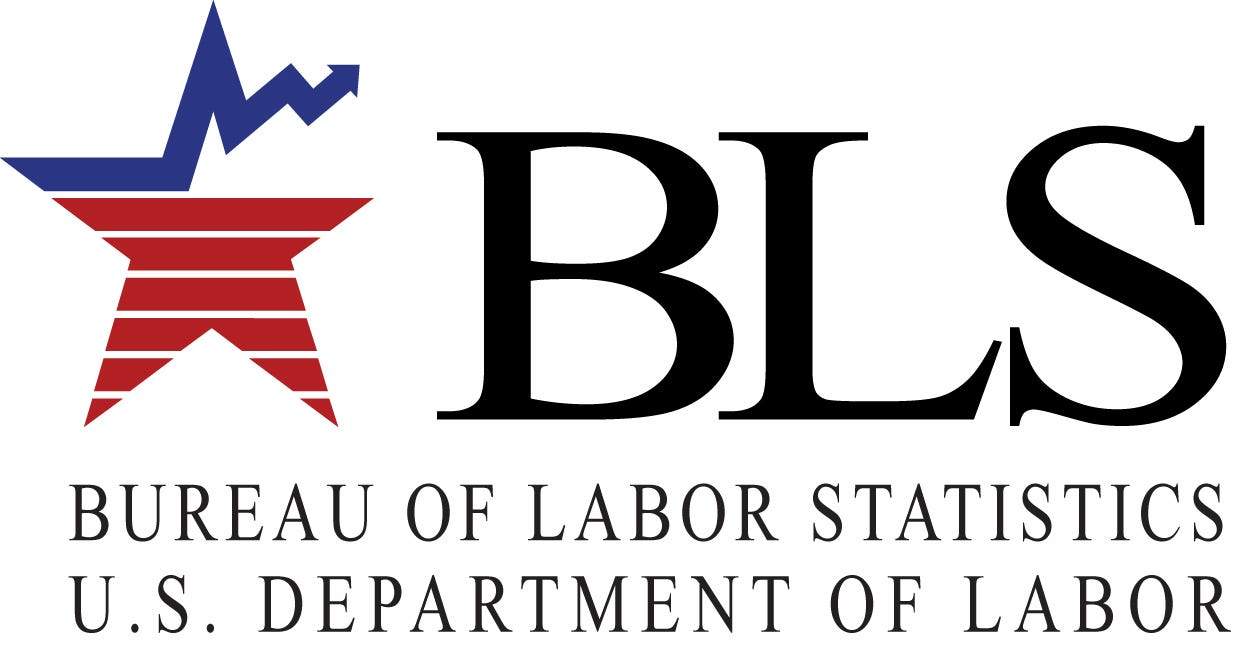

## **1. api_key en archivo .env** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)

In [1]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [12]:
import os
from dotenv import load_dotenv

# Carga las variables de entorno desde el archivo .env
load_dotenv()

# Accede a las variables de entorno en tu código
api_key = os.getenv("API_KEY")

## **2. Descargando de la API** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


In [3]:
import requests
import json

headers = {'Content-type': 'application/json'}
data = json.dumps({
    "seriesid": ['CUUR0000SA0', 'SUUR0000SA0'],
    "startyear": "2011",
    "endyear": "2014"
})

api_key = "fa5d296842774cbdb2452768bdeace89"  
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

response = requests.post(url, data=data, headers=headers, params={"registrationKey": api_key})

if response.status_code == 200:
    json_data = json.loads(response.text)
    # Aquí puedes procesar los datos de respuesta
else:
    print("Error al obtener datos de la API:", response.status_code)

In [4]:
if response.status_code == 200:
    json_data = json.loads(response.text)
    # Aquí puedes procesar los datos de respuesta
    print("Datos de respuesta:", json_data)
else:
    print("Error al obtener datos de la API:", response.status_code)
    print("Texto de respuesta:", response.text)

Datos de respuesta: {'status': 'REQUEST_SUCCEEDED', 'responseTime': 180, 'message': [], 'Results': {'series': [{'seriesID': 'CUUR0000SA0', 'data': [{'year': '2014', 'period': 'M12', 'periodName': 'December', 'value': '234.812', 'footnotes': [{}]}, {'year': '2014', 'period': 'M11', 'periodName': 'November', 'value': '236.151', 'footnotes': [{}]}, {'year': '2014', 'period': 'M10', 'periodName': 'October', 'value': '237.433', 'footnotes': [{}]}, {'year': '2014', 'period': 'M09', 'periodName': 'September', 'value': '238.031', 'footnotes': [{}]}, {'year': '2014', 'period': 'M08', 'periodName': 'August', 'value': '237.852', 'footnotes': [{}]}, {'year': '2014', 'period': 'M07', 'periodName': 'July', 'value': '238.250', 'footnotes': [{}]}, {'year': '2014', 'period': 'M06', 'periodName': 'June', 'value': '238.343', 'footnotes': [{}]}, {'year': '2014', 'period': 'M05', 'periodName': 'May', 'value': '237.900', 'footnotes': [{}]}, {'year': '2014', 'period': 'M04', 'periodName': 'April', 'value': '

In [5]:
import requests
import pandas as pd

api_key = "fa5d296842774cbdb2452768bdeace89"

# Define the series and the desired time range
series_info = {
    "LNS14000000": "Unemployment Rate",
    "CES0000000001": "Total Nonfarm Employment",
    "LNS11300000": "Labor Force Participation Rate",
    "LNU04000000": "Civilian Labor Force",
    "LNS12000000": "Employed",
    "LNS12300000": "Not in Labor Force",
    "CES0500000003": "Average Hourly Earnings",
    "CES0500000001": "Average Weekly Earnings",
    "LNS12035019": "Unemployment Rate - White",
    "CUUR0000SA0": "Consumer Price Index for All Urban Consumers (CPI-U)"
}

start_year = 2004# Define the start year
end_year = 2023   # Define the end year

base_url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"

# Initialize a list to store the DataFrames of the series
data_frames = []

# Loop through the series and retrieve data for the specified time range
for series_id in series_info.keys():
    url = f"{base_url}{series_id}?registrationkey={api_key}&startyear={start_year}&endyear={end_year}&format=json"
    response = requests.get(url)
    data = response.json()
    if "Results" in data and "series" in data["Results"]:
        series_data = data["Results"]["series"][0]
        df = pd.DataFrame(series_data["data"])
        df["series_id"] = series_id
        data_frames.append(df)

# Concatenate the DataFrames into one
final_df = pd.concat(data_frames)

In [6]:
final_df

,year,period,periodName,latest,value,footnotes,series_id
0,2023,M08,August,true,3.8,[{}],LNS14000000
1,2023,M07,July,NaN,3.5,[{}],LNS14000000
2,2023,M06,June,NaN,3.6,[{}],LNS14000000
3,2023,M05,May,NaN,3.7,[{}],LNS14000000
4,2023,M04,April,NaN,3.4,[{}],LNS14000000
...,...,...,...,...,...,...,...
231,2004,M05,May,NaN,189.1,[{}],CUUR0000SA0
232,2004,M04,April,NaN,188.0,[{}],CUUR0000SA0
233,2004,M03,March,NaN,187.4,[{}],CUUR0000SA0
234,2004,M02,February,NaN,186.2,[{}],CUUR0000SA0


In [5]:
final_df.columns

Index(['year', 'period', 'periodName', 'latest', 'value', 'footnotes',
       'series_id'],
      dtype='object')

## **3. Data Wrangling** <a class="anchor" id="3"></a>

[Table of Contents](#0.1) 

In [7]:
# Utiliza pivot_table para reorganizar los datos
pivot_df = final_df.pivot_table(index=['year', 'period'], columns='series_id', values='value')

# Reinicia los índices para obtener una estructura de DataFrame plana
pivot_df.reset_index(inplace=True)

# Muestra el nuevo DataFrame
print(pivot_df)

series_id  year period  CES0000000001  CES0500000001  CES0500000003  \
0          2004    M01       130765.0       109227.0            NaN   
1          2004    M02       130822.0       109272.0            NaN   
2          2004    M03       131139.0       109551.0            NaN   
3          2004    M04       131410.0       109796.0            NaN   
4          2004    M05       131694.0       110080.0            NaN   
..          ...    ...            ...            ...            ...   
231        2023    M04       155689.0       133086.0          33.34   
232        2023    M05       155970.0       133341.0          33.45   
233        2023    M06       156075.0       133427.0          33.60   
234        2023    M07       156232.0       133582.0          33.74   
235        2023    M08       156419.0       133761.0          33.82   

series_id  CUUR0000SA0  LNS11300000  LNS12000000  LNS12035019  LNS12300000  \
0              185.200         66.1     138472.0     136228.0        

In [8]:
# Diccionario de mapeo de series_id a nombres deseados
nombre_series = {
    "year": "Year", 
    "period": "Period",
    "LNS14000000": "Unemployment Rate",
    "CES0000000001": "Total Nonfarm Employment",
    "LNS11300000": "Labor Force Participation Rate",
    "LNU04000000": "Civilian Labor Force",
    "LNS12000000": "Employed",
    "LNS12300000": "Not in Labor Force",
    "CES0500000003": "Average Hourly Earnings",
    "CES0500000001": "Average Weekly Earnings",
    "LNS12035019": "Unemployment Rate - White",
    "CUUR0000SA0": "Consumer Price Index for All Urban Consumers (CPI-U)"
}

# Aplica el mapeo para cambiar los nombres de las columnas
pivot_df.columns = pivot_df.columns.map(nombre_series)

## **4. Analizando la tasa de desempleo en EEUU** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

In [9]:
pivot_df

series_id,Year,Period,Total Nonfarm Employment,Average Weekly Earnings,Average Hourly Earnings,Consumer Price Index for All Urban Consumers (CPI-U),Labor Force Participation Rate,Employed,Unemployment Rate - White,Not in Labor Force,Unemployment Rate,Civilian Labor Force
0,2004,M01,130765.0,109227.0,NaN,185.200,66.1,138472.0,136228.0,62.3,5.7,6.3
1,2004,M02,130822.0,109272.0,NaN,186.200,66.0,138542.0,136362.0,62.3,5.6,6.0
2,2004,M03,131139.0,109551.0,NaN,187.400,66.0,138453.0,136302.0,62.2,5.8,6.0
3,2004,M04,131410.0,109796.0,NaN,188.000,65.9,138680.0,136474.0,62.3,5.6,5.4
4,2004,M05,131694.0,110080.0,NaN,189.100,66.0,138852.0,136556.0,62.3,5.6,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
231,2023,M04,155689.0,133086.0,33.34,303.363,62.6,161031.0,158639.0,60.4,3.4,3.1
232,2023,M05,155970.0,133341.0,33.45,304.127,62.6,160721.0,158416.0,60.3,3.7,3.4
233,2023,M06,156075.0,133427.0,33.60,305.109,62.6,160994.0,158853.0,60.3,3.6,3.8
234,2023,M07,156232.0,133582.0,33.74,305.691,62.6,161262.0,159099.0,60.4,3.5,3.8


### **4.1 Evaluating Performance** <a class="anchor" id="4.1"></a>

[Table of Contents](#0.1)

Usamos group by para poder, obtener un resumen de la sumatoraria total de la tasa de desempleo. Así sabremos si ese año fue bueno para la gente de dicho país. Del año 2004 al 2023 (que han un no concluye), podemos observar diferentes variaciones en la tasa de desempleo. Esto se debe a los efectos económicos que se generan en la economía global.

A través de este indicadores, podremos apreciar que años fueron los más afectados en la economía de los Estados Unidos.

In [33]:
sum_unemployment_by_year = pivot_df.groupby("Year")["Unemployment Rate"].sum()
sum_unemployment_by_year

Year
2004     66.5
2005     61.0
2006     55.3
2007     55.4
2008     69.6
2009    111.4
2010    115.3
2011    107.2
2012     96.9
2013     88.3
2014     73.9
2015     63.3
2016     58.5
2017     52.3
2018     46.7
2019     44.2
2020     97.1
2021     64.4
2022     43.7
2023     28.5
Name: Unemployment Rate, dtype: float64

A simple vista se pueden observar que en la mayoría de los años la tasa de desempleo estuvo relativamente baja, aunque para este analisis vamos a enfocarnos en las tasas de desempleo que fueron mayores a 90% durante todo el año natural.

### **4.2 Filtramos** <a class="anchor" id="4.2"></a>

[Table of Contents](#0.1)

In [28]:
unemployment =sum_unemployment_by_year[sum_unemployment_by_year > 90]
unemployment

Year
2009    111.4
2010    115.3
2011    107.2
2012     96.9
2020     97.1
Name: Unemployment Rate, dtype: float64

Ahora, podemos observar los años que aparentemente fueron más dificiles para la gente en EEUU, pues tuvieron problemas poder conseguir empleo. Se puede observar cone este filtro que los años donde se vieron más afectados fueron los años 2009, 2010, 2011 y 2020.

Por teoría economica global, se podría decir, que estas altas tasas se generaron por 2 fenomenos económicos que impactaron en el mundo. Estos son "la burbuja financiera 2008" y la "covid19".

Para el siguiente analisis, vamos a buscar la mayor tasa de desempleo en un periodo especifico, es decir, queremos saber cuál afecto más a este ratio de desempleo.

### **4.3 Max** <a class="anchor" id="4.3"></a>

[Table of Contents](#0.1)

In [35]:
pivot_df["YearMonth"] = pivot_df["Year"].astype(str) + pivot_df["Period"]

max_unemployment_date = pivot_df[pivot_df["Unemployment Rate"] == pivot_df["Unemployment Rate"].max()]["YearMonth"].values[0]

max_unemployment_year = max_unemployment_date[:-2]  
max_unemployment_month = max_unemployment_date[-2:]
print(max_unemployment_year,max_unemployment_month)

2020M 04


Con esta función, podemos apreciar que el periodo donde hubo mayor desempleo, fue en el año 2022 mes de abril, especificamente cuando se empezaron a dar las cuarentenas por la terrible pandemia.

Finalmente, vamos a ver un pequeño gráfico de la tasa de desempleo, para poder obtener más información de como se fue desarrollando en este país.

### **4.4 Gráfico** <a class="anchor" id="4.4"></a>

[Table of Contents](#0.1)

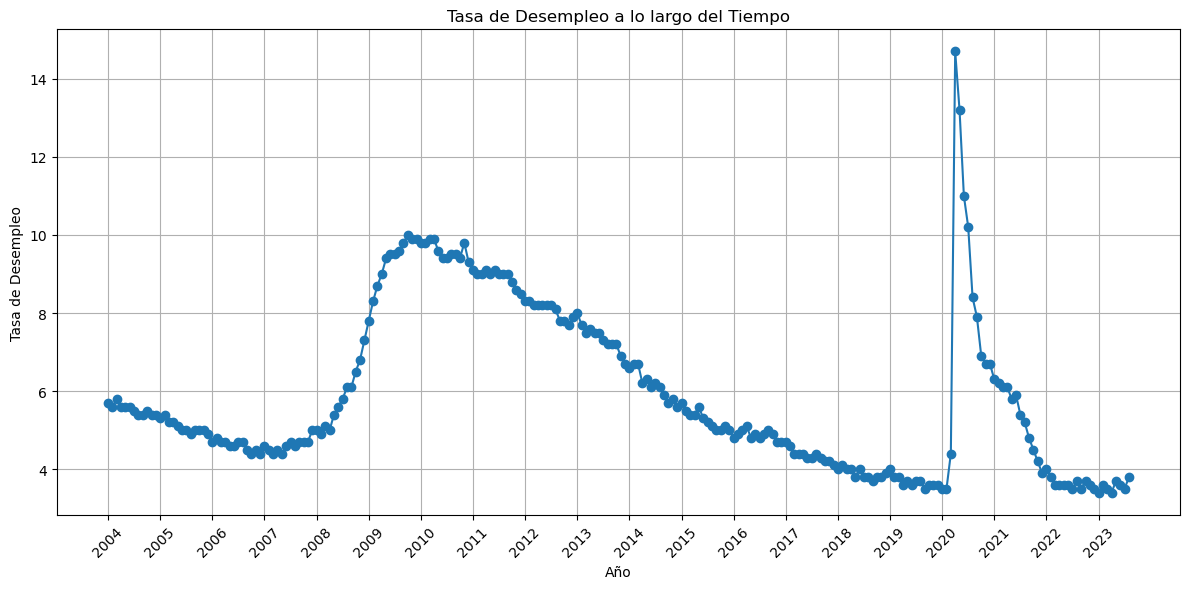

In [32]:
# Crear una columna combinada para el año y mes
pivot_df["YearMonth"] = pivot_df["Year"].astype(str) + pivot_df["Period"]

# Crear un gráfico de línea temporal
plt.figure(figsize=(12, 6))
plt.plot(pivot_df.index, pivot_df["Unemployment Rate"], marker='o', linestyle='-')
plt.title("Tasa de Desempleo a lo largo del Tiempo")
plt.xlabel("Año")
plt.ylabel("Tasa de Desempleo")

# Mostrar solo los años en el eje X
years = pivot_df["Year"].unique()
plt.xticks(range(len(pivot_df.index))[::12], years, rotation=45)

plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Se dieron situaciones en el que la tasa de desempleo fue muy alta, pero con el paso de tiempo, se fue suavisando.